I will be using the FundamentalAnalysis package in order to collect fundamentals and detailed company stock data from a large group of companies (13.000+) from FinancialModelingPrep, which uses Yahoo Finance to obtain stock data for any financial instrument. It allows the user to do most of the essential fundamental analysis. It also gives the possibility to quickly compare multiple companies or do a sector analysis.

In [1]:
import FundamentalAnalysis as fa
import pandas as pd
import random

#random seed for my random selection of companies
random.seed(10)

api_key = "ecaafafe2423a433c4cb7922fde08d46" 

# Collect all available companies into a panda Dataframe
companies = fa.available_companies(api_key)
company_list = companies.index.tolist()

# Get a random collection of 500 companies
num = 500
random_company_list = random.sample(company_list, num)

In [2]:
print(random_company_list[:5])

['ATS.L', 'ATSG', 'GLIN', 'GODFRYPHLP.NS', 'CLON.L']


In [137]:
#Create function to find EV
def calculateEV(ticker):
    '''
    Returns the enterprise, market cap, cash, and debt value calculated by the formula: ev = market cap + debt - cash, 
    for the company symbol given by argument, 'ticker', a string.
    '''
    # Collect market cap., cash and cash equivalents, total debt
    enterprise_value = fa.enterprise(ticker, api_key)
    
    try:
        #Find market cap
        market_cap = enterprise_value.loc["marketCapitalization"] 
        market_cap_list = market_cap.tolist() 
        market_cap_value = market_cap_list[0] #latest market cap. value

        #Find cash and cash equivalent
        cash = enterprise_value.loc["minusCashAndCashEquivalents"] 
        cash_list = cash.tolist() 
        cash_value = cash_list[0] #latest cash value

        #Find total debt
        debt = enterprise_value.loc["addTotalDebt"] 
        debt_list = debt.tolist() 
        debt_value = debt_list[0] #latest debt value

        # Calculate enterprise value
        ev = market_cap_value + debt_value - cash_value
        
    except KeyError: #if there are no values associated with the company, return 0
        ev, market_cap_value, cash_value, debt_value = [0, 0, 0, 0]
        
    return ev, market_cap_value, cash_value, debt_value

In [146]:
#iterate over all our random companies to find their enterprise, market cap, cash, and debt values
all_values_list = []
num = 50 # should be 500 to get all 500 companies, but requests are limited to 250 a day, so limit it to 50 for now
for symbol in random_company_list[:num]:
    values = calculateEV(symbol) #get all 4 values
    all_values_list.append(list(values))

In [147]:
#Label the values with the respective company symbol
combined_list = []
for i in range(len(all_values_list)):
    val_list = all_values_list[i]
    val_list.insert(0, random_company_list[i])
    combined_list.append(val_list)

In [148]:
#Create a pandas dataframe showing our data
df = pd.DataFrame(combined_list, columns =['Symbol', 'Enterprise Value', 'Market Cap', 'Cash', 'Debt']) 
df.head(num)

,Symbol,Enterprise Value,Market Cap,Cash,Debt
0,ATS.L,1.074478e+10,1.074976e+10,4974000.0,0.000000e+00
1,ATSG,2.941800e+09,1.502442e+09,39719000.0,1.479077e+09
2,GLIN,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,GODFRYPHLP.NS,5.330310e+10,5.225389e+10,246434000.0,1.295648e+09
4,CLON.L,7.704522e+08,7.707535e+08,301292.0,0.000000e+00
5,TAP,2.070022e+10,1.218592e+10,523400000.0,9.037700e+09
6,IVOP,0.000000e+00,0.000000e+00,0.0,0.000000e+00
7,UZU.DE,3.262431e+08,3.026591e+08,26338000.0,4.992200e+07
8,6969.HK,0.000000e+00,0.000000e+00,0.0,0.000000e+00
9,MANAKCOAT.NS,9.643673e+08,2.064323e+08,8763000.0,7.666980e+08


Quick Note: Task specifications to to get 500 companies, however as the number of requests to the API is limited to 250 a day, I have only put through 50 companies for now, which could easily be changed by changing the 'num' variable above from 50 to 500.

To summarise, above we have collected data from 5 random companies - their market cap, cash, and debt in order to calculate enterprise value. Companies with no listed entries for any of the variables will return 'Null', such as in the example above. The data is then displayed in a nice Panda DataFrame format for easy viewing and comparison.

We can calculate the specific EV for certain companies if need be as well, given by the function below:

In [7]:
def getEVcompany(ticker):
    '''
    Function to specifically calculate EV for certain company symbol given by ticker
    '''
    ev, market_cap_value, cash_value, debt_value = calculateEV(ticker)
    print(f'Enterprise Value for {ticker}: {ev}')

In [8]:
getEVcompany('ATSG') #enter required company name here

Enterprise Value for ATSG: 2941800480


Next, we will be looking into getting the FY21 and FY23 EBIT of these companies. For this section, my method of forecastinf the FY21 and FY23 will be to get the EBIT of all the previous years, and then running it through a moving average forecasting method to give us predicted values for FY21 and FY23 EBIT values.

In [10]:
# Get the Income Statements
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

In [71]:
import numpy as np

#Creating function to calculate EBIT
def calculateEBIT(ticker, x = 5):
    '''
    Calculates x years worth of ebit values for company symbol 'ticker', returns a list of x length of ebit values for each year
    '''
    
    try:
        # Get the Income Statements
        income_statement_annually = fa.income_statement(ticker, api_key, period="annual")
    
        #Find x years worth of income data
        income = income_statement_annually.loc["netIncome"] 
        income_arr = np.array(income.tolist()[:x]) #latest 5 years worth of income data

        #Find x years worth of interest data
        interest = income_statement_annually.loc["interestExpense"] 
        interest_arr = np.array(interest.tolist()[:x])

        #Find x years worth of tax data
        tax = income_statement_annually.loc["incomeTaxExpense"] 
        tax_arr = np.array(tax.tolist()[:x])

        # Calculate ebit value based on these values
        ebit = income_arr + interest_arr + tax_arr
        
    except: #if there are no values associated with the company, return array of 0's
        return np.zeros(x)

    return ebit

In [149]:
#iterate over all our random companies to find EBIT values
ebit_value_list = []
num = 50 # should be 500 to get all 500 companies, but requests are limited to 250 a day, so limit it to 50 for now
for symbol in random_company_list[:num]:
    ebit_vals = calculateEBIT(symbol)[::-1]
    ebit_value_list.append(list(ebit_vals))

In [150]:
#Label the values with the respective company symbol
comb_list = []
for i in range(len(ebit_value_list)):
    val_list = ebit_value_list[i]
    val_list.insert(0, random_company_list[i])
    comb_list.append(list(val_list))

In [151]:
#Create a pandas dataframe showing our data
df2 = pd.DataFrame(comb_list, columns =['Symbol', '2016 Ebit', '2017 Ebit', '2018 Ebit', '2019 Ebit', '2020 Ebit']) 
df2.head(num)

,Symbol,2016 Ebit,2017 Ebit,2018 Ebit,2019 Ebit,2020 Ebit
0,ATS.L,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,ATSG,48200000.0,7.242000e+06,1.176790e+08,1.394350e+08,111322000.0
2,GLIN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,GODFRYPHLP.NS,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,CLON.L,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
5,TAP,531600000.0,-9.967673e+08,1.710300e+09,1.647900e+09,756300000.0
6,IVOP,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
7,UZU.DE,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
8,6969.HK,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
9,MANAKCOAT.NS,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Unfortunately, the API I have chosen seems to lack alot of data regarding EBIT calculations, and has some of the data features locked in a paywall, so out of the 50 companies it has done calculations for a couple of companies.
Doing a moving average forecast of the 2021 and 2023 EBIT values for the specified company:

In [152]:
for i in range(3): #forecast for 3 years ahead
    for index, company in enumerate(comb_list):
        moving_average = sum(company[i+1:])/len(company[i+1:])
        comb_list[index].append(moving_average)

<ipython-input-152-e47aa7be2ecc>:3: RuntimeWarning: overflow encountered in long_scalars
  moving_average = sum(company[i+1:])/len(company[i+1:])


In [153]:
df3 = pd.DataFrame.from_records(comb_list)
df3.columns = ['Company', 'EBIT: 2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

In [155]:
df3.head(num) # EBITS for FY21 and FY23 are displayed below in the corresponding columns

,Company,EBIT: 2016,2017,2018,2019,2020,2021,2022,2023
0,ATS.L,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,ATSG,48200000.0,7.242000e+06,1.176790e+08,1.394350e+08,1.113220e+08,8.477560e+07,9.209072e+07,1.090605e+08
2,GLIN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,GODFRYPHLP.NS,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,CLON.L,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,TAP,531600000.0,-9.967673e+08,1.710300e+09,1.647900e+09,7.563000e+08,-1.291269e+08,-2.612723e+08,-1.141733e+08
6,IVOP,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,UZU.DE,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,6969.HK,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,MANAKCOAT.NS,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Now we move on to calculating the growth rate of the companies:

In [156]:
growth_rate = []
for number in comb_list:
    ebit_23 = number[-1]
    ebit_21 = number[-3]
    if ebit_21 == 0 or ebit_23 == None: #avoiding division by 0 or null errors
        growth = 0
    else:
        growth = (ebit_23/ebit_21)**(0.5) - 1
    growth_rate.append(growth)

<ipython-input-156-45d14f6719a1>:8: RuntimeWarning: invalid value encountered in double_scalars
  growth = (ebit_23/ebit_21)**(0.5) - 1


In [157]:
num = 50
combined = zip(random_company_list[:num], growth_rate)

In [158]:
for comp, rate in combined:
    print(f'Company {comp} has growth rate of: {rate}.') #Where growth rate of zero represents invalid division by zero

Company ATS.L has growth rate of: 0.
Company ATSG has growth rate of: 0.13422243769629238.
Company GLIN has growth rate of: 0.
Company GODFRYPHLP.NS has growth rate of: 0.
Company CLON.L has growth rate of: 0.
Company TAP has growth rate of: -0.05968386170339657.
Company IVOP has growth rate of: 0.
Company UZU.DE has growth rate of: 0.
Company 6969.HK has growth rate of: 0.
Company MANAKCOAT.NS has growth rate of: 0.
Company ACEZ has growth rate of: -0.12852013482031355.
Company ALDUB.PA has growth rate of: 0.
Company ALNU.ME has growth rate of: 0.
Company SKLZ has growth rate of: 0.
Company MACQW has growth rate of: 0.
Company EPE has growth rate of: 0.
Company 0G8X.L has growth rate of: 0.
Company LFIC.NS has growth rate of: 0.
Company RBA.TO has growth rate of: 0.
Company ADMS has growth rate of: 0.017807904140531017.
Company ALLO has growth rate of: 0.028970379436007665.
Company IKE.AX has growth rate of: 0.
Company SMTAX has growth rate of: 0.
Company NTRI has growth rate of: 0.08

We can easily extend the above code to handle 500 companies, however due to the restrictions on the number of requests a day, I limited the above calculations to only 50 companies. Also, there are some features that are limited behind paywalls, which would give me more data and thus allow for the calculations of growth rates for more companies.

Now we will move onto making a scatter plot of growth rate against EV/FY21 BIT

<ipython-input-182-1686bbc6318e>:5: RuntimeWarning: divide by zero encountered in true_divide
  y_axis_vals = np.array(ev_list)/np.array(FY21_BIT)
<ipython-input-182-1686bbc6318e>:5: RuntimeWarning: invalid value encountered in true_divide
  y_axis_vals = np.array(ev_list)/np.array(FY21_BIT)


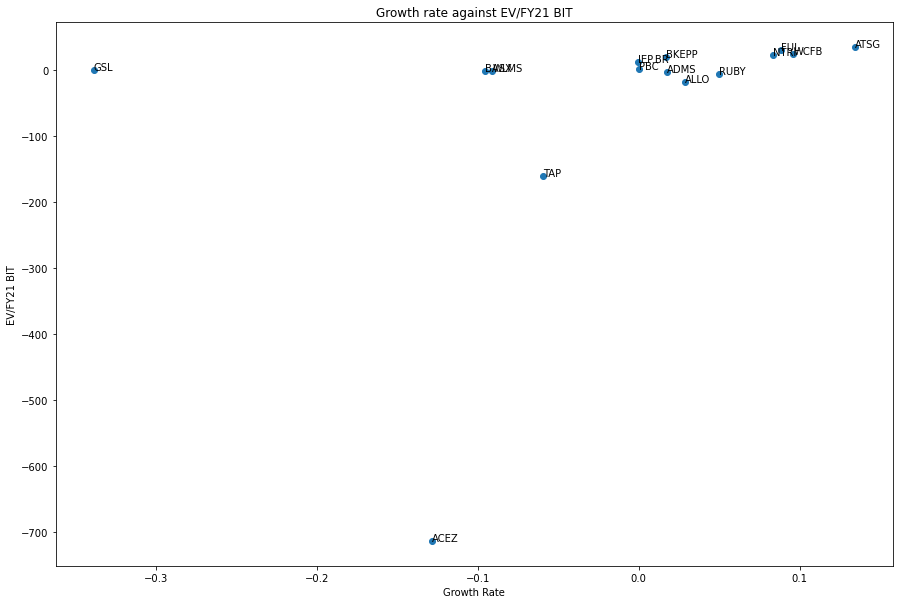

In [182]:
import matplotlib.pyplot as plt

ev_list = [x[1] for x in combined_list] #getting ev 
FY21_BIT = [y[-3] for y in comb_list] #getting fy21 bit
y_axis_vals = np.array(ev_list)/np.array(FY21_BIT)

#plt.scatter(growth_rate, y_axis_vals, alpha=0.5)

fig, ax = plt.subplots()
ax.scatter(growth_rate, y_axis_vals)

plt.xlabel('Growth Rate')
plt.ylabel('EV/FY21 BIT')
plt.title('Growth rate against EV/FY21 BIT')

for i, txt in enumerate(random_company_list[:num]):
    ax.annotate(txt, (growth_rate[i], y_axis_vals[i]))
    
plt.gcf().set_size_inches((15, 10)) 



Above we have plotted the scatterplot of the data. I would be able to get the full required 500 companies worth of data with a paid account, however, since I am currently using a free account, I am limited to 250 requests a day, thus I can only go up to a limited number of companies. However, the code above would be very easy to adapt to 500 companies worth of data, simply by changing some of the input 'num' parameters.

I hope that this all looks okay, I had fun completing the exercise, and I look forward to speaking to you in the future! 